<a href="https://colab.research.google.com/github/100451218/Grupo42-Practica1/blob/main/Copia_de_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100451218- Sergi Vila
100451058-Daniel Obreo

# Análisis exploratorio de datos

Para el análisis exploratorio de datos vamos a observar:
1. Qué valores son siempre 0
2. Qué valores son constantes
3. Qué correlación hay entre columnas
4. Qué correlación hay entre las columnas y la salida
5. Hipótesis


### Importamos las librerías y cargamos los datos


In [39]:
!pip install pd
!pip install seaborn

import pandas as pd
#Importamos los dos conjuntos de datos.
disp_df = pd.read_csv("disp_st42ns1.txt.bz2",
 compression="bz2", 
 index_col=0)
comp_df = pd.read_csv("comp_st42ns1.txt.bz2", 
 compression="bz2", 
 index_col=0)
#print(disp_df['apcp_sf1_1'][0])
pd.set_option('display.max_columns', None)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Comprobamos valores a 0


In [40]:
for i in disp_df:
  if disp_df[i].sum()==0:
    print(i)
  """Con esta linea podemos ver las filas con todos los valores en 0, ya que 
  vemos después que no hay números negativos"""
  # print(i ,": ",disp_df[i].value_counts())
  for k in range(len(disp_df[i])):
    if disp_df[i][k]<0:
      """Si hubiera un número negativo se imprimiría hay"""
      print("Hay")

uswrf_s1_1


Hemos podido observar que la columna uswrf_s1_1 es inútil

### Comprobamos valores constantes


In [41]:
#También vamos a comprobar si el valor es constante
"""print(disp_df["uswrf_s1_1"].nunique())"""
#Cómo hemos dicho antes, sólo hay un número único
for i in disp_df:
  if disp_df[i].nunique()==1:
    print(i)

uswrf_s1_1


Sale la misma columna ya que es constante en 0


### Comprobamos correlación entre columnas

Vamos a mirar para un umbral de 0.95

In [42]:
list=[]
for i in disp_df:
  for k in disp_df:
    """print(disp_df[i].corr(disp_df[k]))"""
    #Esto nos sirve para saber que 1 es el máximo
    if i!=k and not -0.95<=disp_df[i].corr(disp_df[k])<=0.95 and i!="uswrf_s1_1" and k!="uswrf_s1_1":
      if [i,k] not in list and [k,i] not in list:
        list.append([i,k])
        print(i,", ",k," : ",disp_df[i].corr(disp_df[k]))
      
print(list)

dlwrf_s1_1 ,  dlwrf_s2_1  :  0.9703837115052251
dlwrf_s1_1 ,  dlwrf_s3_1  :  0.9618644397452982
dlwrf_s2_1 ,  dlwrf_s3_1  :  0.9941484165303395
dlwrf_s3_1 ,  dlwrf_s4_1  :  0.9714313070426391
dlwrf_s3_1 ,  dlwrf_s5_1  :  0.9628906707604897
dlwrf_s4_1 ,  dlwrf_s5_1  :  0.9976436933451329
dswrf_s2_1 ,  dswrf_s3_1  :  0.9571667754289556
dswrf_s2_1 ,  uswrf_s2_1  :  0.9942986544231128
dswrf_s3_1 ,  uswrf_s2_1  :  0.964297736448637
dswrf_s3_1 ,  uswrf_s3_1  :  0.9620365523744548
dswrf_s4_1 ,  dswrf_s5_1  :  0.9846653842283272
pres_ms1_1 ,  pres_ms2_1  :  0.9861133756671324
pres_ms1_1 ,  pres_ms3_1  :  0.9501939300486043
pres_ms2_1 ,  pres_ms3_1  :  0.9855174686825475
pres_ms3_1 ,  pres_ms4_1  :  0.9852195616314235
pres_ms3_1 ,  pres_ms5_1  :  0.9503729775888822
pres_ms4_1 ,  pres_ms5_1  :  0.983982500363903
pwat_ea1_1 ,  pwat_ea2_1  :  0.987536536664307
pwat_ea1_1 ,  pwat_ea3_1  :  0.963475239218834
pwat_ea2_1 ,  pwat_ea3_1  :  0.9888327077899062
pwat_ea2_1 ,  pwat_ea4_1  :  0.9641615077236

En list tenemos todas las columnas altamente correlacionadas


In [43]:
#display(disp_df)
import numpy as np
from numpy.lib.function_base import disp
import pandas as pd
for i in disp_df:
  for k in range(len(disp_df[i])):
    if disp_df[i][k]==np.nan:
      print(i)

####Normalizamos los datos


In [44]:
from sklearn.preprocessing import RobustScaler
pd.set_option('display.max_rows', None)
#display(disp_df.var())
X=disp_df.values
robust = RobustScaler()
scaled_values = robust.fit_transform(X)
scaled_matrix = pd.DataFrame(scaled_values)
#Creemos que necesitamos hacer la normalización más adelante y al splited data
index = 0
for i in disp_df:
  print(i, scaled_matrix[index].std())
  index += 1

apcp_sf1_1 35.34527131609055
apcp_sf2_1 66.53638839905511
apcp_sf3_1 53.13619594585077
apcp_sf4_1 0.6902865527001909
apcp_sf5_1 388.61446765566023
dlwrf_s1_1 0.5690586015004552
dlwrf_s2_1 0.5604280980745557
dlwrf_s3_1 0.5599100960180365
dlwrf_s4_1 0.5547244234757622
dlwrf_s5_1 0.5511972663349181
dswrf_s1_1 0.11261614127640085
dswrf_s2_1 0.5244378685307185
dswrf_s3_1 0.542719374275947
dswrf_s4_1 0.5831412440294939
dswrf_s5_1 0.5448927304212977
pres_ms1_1 0.8013205554909132
pres_ms2_1 0.8000760839594527
pres_ms3_1 0.8045473701643405
pres_ms4_1 0.8150731212020463
pres_ms5_1 0.8075559976191413
pwat_ea1_1 0.6082063140958146
pwat_ea2_1 0.6072553678220067
pwat_ea3_1 0.6039178374017136
pwat_ea4_1 0.5997911606743963
pwat_ea5_1 0.5956526216702805
spfh_2m1_1 0.5815653017261748
spfh_2m2_1 0.5690428651413918
spfh_2m3_1 0.5708540110551112
spfh_2m4_1 0.5792918254933966
spfh_2m5_1 0.5772227939267285
tcdc_ea1_1 3.7599959314426297
tcdc_ea2_1 4.285342587457867
tcdc_ea3_1 5.05894175114318
tcdc_ea4_1 4.821

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='apcp_sf5_1', ylabel='Density'>

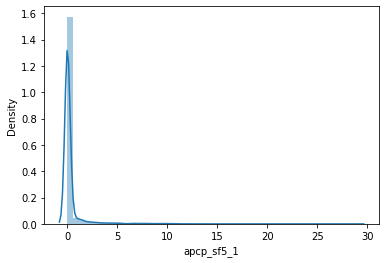

In [45]:
import seaborn

seaborn.distplot(disp_df["apcp_sf5_1"])
#seaborn.distplot(scaled_matrix[4])
#seaborn.boxplot(scaled_matrix[4])

###Comprobamos la correlación con la salida


In [46]:
lista_salida=[]
for i in disp_df:
    print("correlación salida con ", i, disp_df[i].corr(disp_df["salida"]))
    if disp_df[i].corr(disp_df["salida"])>0.85 or disp_df[i].corr(disp_df["salida"])<-0.85:
      lista_salida.append(i)

correlación salida con  apcp_sf1_1 -0.16213021417225146
correlación salida con  apcp_sf2_1 -0.22693195305515088
correlación salida con  apcp_sf3_1 -0.25482657684032034
correlación salida con  apcp_sf4_1 -0.24638359175743108
correlación salida con  apcp_sf5_1 -0.251709690802096
correlación salida con  dlwrf_s1_1 0.36538671151738716
correlación salida con  dlwrf_s2_1 0.3324084177854513
correlación salida con  dlwrf_s3_1 0.37153024058007206
correlación salida con  dlwrf_s4_1 0.4618079055814155
correlación salida con  dlwrf_s5_1 0.47720762545798917
correlación salida con  dswrf_s1_1 0.13360641876924823
correlación salida con  dswrf_s2_1 0.8246218105528994
correlación salida con  dswrf_s3_1 0.8802982839969848
correlación salida con  dswrf_s4_1 0.875697345874555
correlación salida con  dswrf_s5_1 0.8773294983106668
correlación salida con  pres_ms1_1 -0.2854430805293465
correlación salida con  pres_ms2_1 -0.2922649346561904
correlación salida con  pres_ms3_1 -0.302003504480284
correlación sal

## Hipótesis



Podemos ver que la columna "uswrf_s1_1" es inútil.
También tenemos en la variable "lista" el array que incluye las combinaciones de variables altamente relacionadas unas con otras. Por último en lista_salida tenemos las columnas altamente correlacionadas con la salida.
Hemos decidido por lo cual reducir el dataset quitando la columna inútil, también vamos a minimizar el número de variables.
No vamos a borrar las variables con baja correlación con la salida ya que dicha correlación es sólo lineal así que al eliminarla podriamos quitar variables altamente correlacionadas no linearmente.

In [47]:
disp_df = disp_df.drop(columns=['uswrf_s1_1'])
for i in list:
  disp_df = disp_df.drop(columns=[i[0]])


KeyError: ignored

# Métodos básicos
